<a href="https://colab.research.google.com/github/Bhuvan-Arora-1313/EDA-Multiple-linear-regression-house_price_perdiction/blob/main/EDA_%26_Multiple_linear_regression_house_price_perdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **House price predition project**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle(1).json to kaggle(1).json


{'kaggle(1).json': b'{"username":"bhuvanarora1313","key":"8a76f2eacc877c53c5f28cb4dae139b7"}'}

In [ ]:
!kaggle datasets download -d dataset-name

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.j': No such file or directory


In [ ]:
df= pd.read_csv("/content/kaggle.json")
#display first 5
df.head()

,"{""username"":""bhuvanarora1313""","key:""8a76f2eacc877c53c5f28cb4dae139b7""}"


Basic data exploration

In [ ]:
#checking shape
print(f"dataset has {df.shape[0]} rows and {df.shape[1]} coloumns.\n")

#coloumn info
df.info()
print("\n")
#sataistics
df.describe()

dataset has 618 rows and 13 coloumns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             607 non-null    float64
 1   area              596 non-null    float64
 2   bedrooms          600 non-null    float64
 3   bathrooms         596 non-null    float64
 4   stories           606 non-null    float64
 5   mainroad          609 non-null    object 
 6   guestroom         615 non-null    object 
 7   basement          615 non-null    object 
 8   hotwaterheating   610 non-null    object 
 9   airconditioning   612 non-null    object 
 10  parking           613 non-null    float64
 11  prefarea          613 non-null    object 
 12  furnishingstatus  613 non-null    object 
dtypes: float64(6), object(7)
memory usage: 62.9+ KB




,price,area,bedrooms,bathrooms,stories,parking
count,6.070000e+02,596.000000,600.000000,596.000000,606.000000,613.000000
mean,4.666231e+06,5048.244966,2.943333,1.276846,1.831683,0.676998
std,1.887745e+06,2166.315665,0.751263,0.494202,0.909847,0.849880
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.290000e+06,3500.000000,2.000000,1.000000,1.000000,0.000000
50%,4.200000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.869500e+06,6240.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


handeling missing values

In [ ]:
#checking missing values
print(df.isnull().sum())

# fill missing value with median
df['price'].fillna(df['price'].median(),inplace=True)
df['area'].fillna(df['area'].median(),inplace=True)
df['bedrooms'].fillna(df['bedrooms'].mode()[0],inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mode()[0],inplace=True)
df['stories'].fillna(df['stories'].mode()[0],inplace=True)
df['mainroad'].fillna(df['mainroad'].mode()[0],inplace=True)
df['guestroom'].fillna(df['guestroom'].mode()[0],inplace=True)
df['basement'].fillna(df['basement'].mode()[0],inplace=True)
df['hotwaterheating'].fillna(df['hotwaterheating'].median,inplace=True)
df['airconditioning'].fillna(df['airconditioning'].median,inplace=True)
df['parking'].fillna(df['parking'].mode()[0],inplace=True)
df['prefarea'].fillna(df['prefarea'].mode()[0],inplace=True)
df['furnishingstatus'].fillna(df['furnishingstatus'].mode()[0],inplace=True)


print(df.isnull().sum())



price               11
area                22
bedrooms            18
bathrooms           22
stories             12
mainroad             9
guestroom            3
basement             3
hotwaterheating      8
airconditioning      6
parking              5
prefarea             5
furnishingstatus     5
dtype: int64
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


<ipython-input-116-149092a05ec7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(),inplace=True)
<ipython-input-116-149092a05ec7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

handel Duplicaet values


In [ ]:
#check for duplicates
print(f"no of duplicates is {df.duplicated().sum()}")

#removing the duplicaets
df.drop_duplicates(inplace=True)
print(f"now the no of duplicates is {df.duplicated().sum()}")


no of duplicates is 64
now the no of duplicates is 0


Dealing with outliers

In [ ]:
#function to detect outliers
def detect_outliers_iqr(df, coloumn):
  Q1= df[coloumn].quantile(0.25)
  Q3= df[coloumn].quantile(0.75)
  IQR=Q3-Q1
  df=df[(df[coloumn]>=(Q1-1.5*IQR))& (df[coloumn]<=(Q3+1.5*IQR))]
  return df
#remove outliers from all numerical attributes
df=detect_outliers_iqr(df,'price')
df=detect_outliers_iqr(df,'area')
#df=detect_outliers_iqr(df,'bedrooms')
#df=detect_outliers_iqr(df,'bathrooms')
#df=detect_outliers_iqr(df,'stories')
#df=detect_outliers_iqr(df,'parking')


univariate analysis

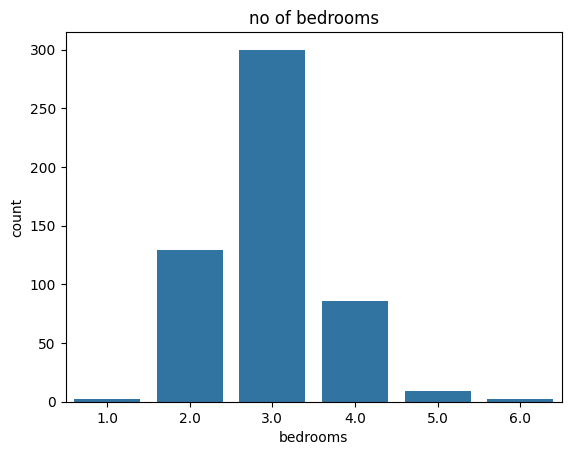

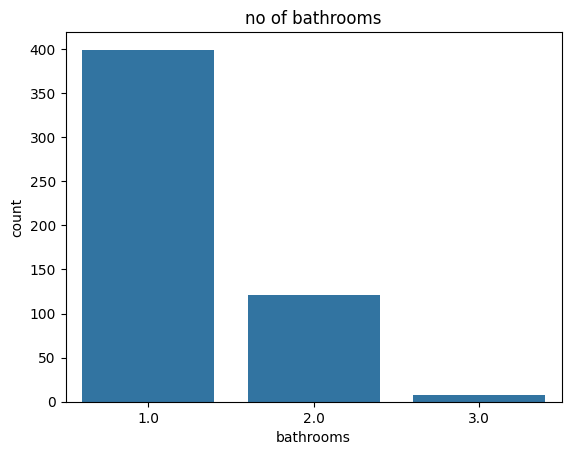

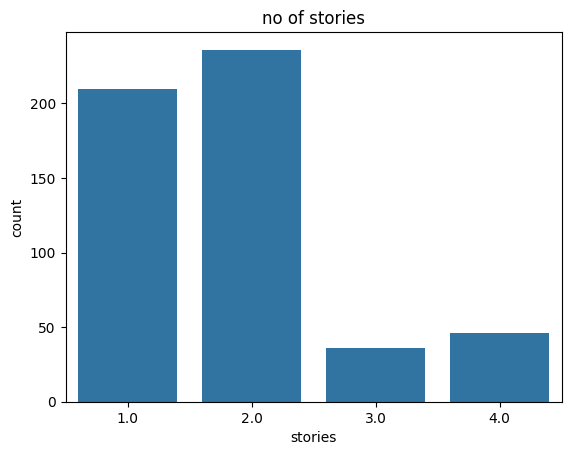

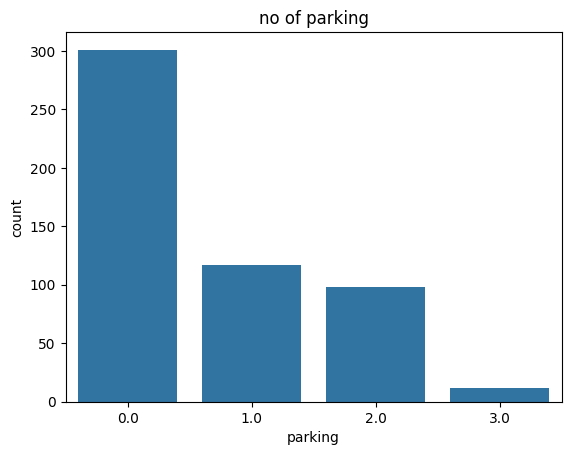

In [ ]:
#countplot for survived
sns.countplot(x='bedrooms',data=df)
plt.title("no of bedrooms")
plt.show()

sns.countplot(x='bathrooms',data=df)
plt.title("no of bathrooms")
plt.show()

sns.countplot(x='stories',data=df)
plt.title("no of stories")
plt.show()

sns.countplot(x='parking',data=df)
plt.title("no of parking")
plt.show()





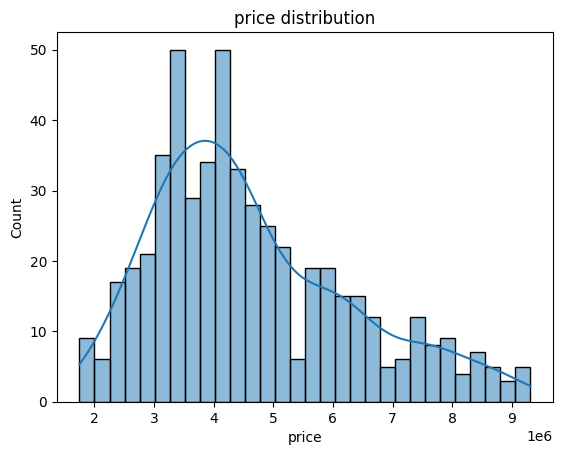

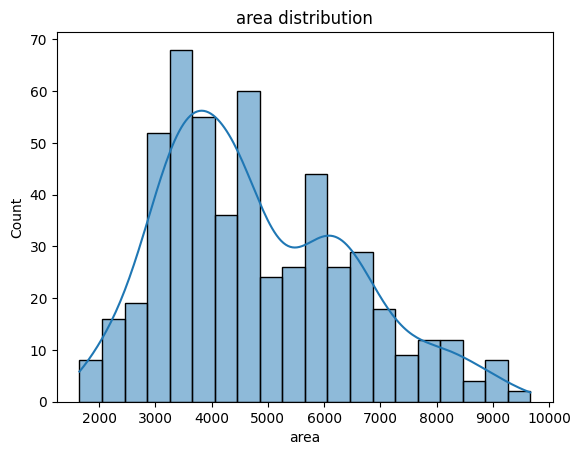

In [ ]:
#histplots

sns.histplot(df['price'],bins=30,kde=True)
plt.title("price distribution")
plt.show()

sns.histplot(df['area'],bins=20,kde=True)
plt.title("area distribution")
plt.show()

Bivariate analysis

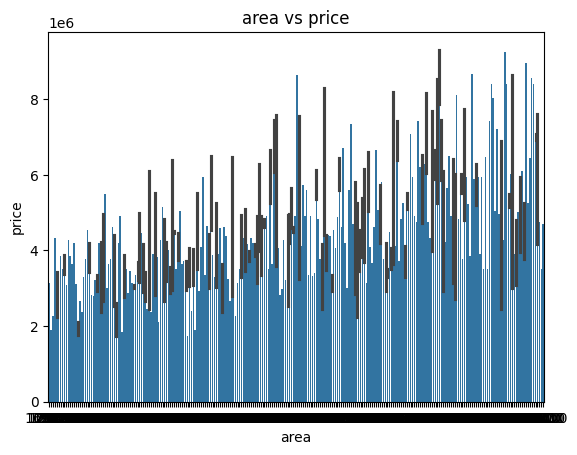

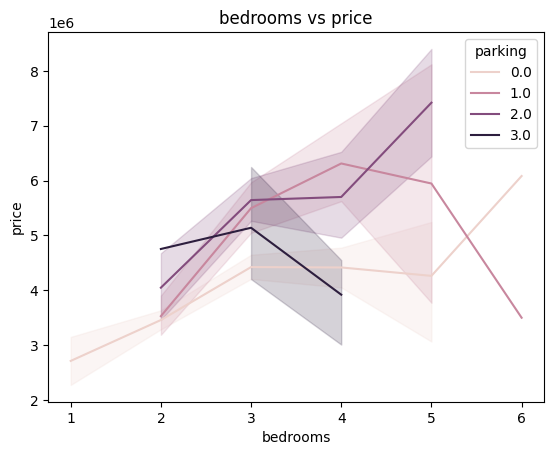

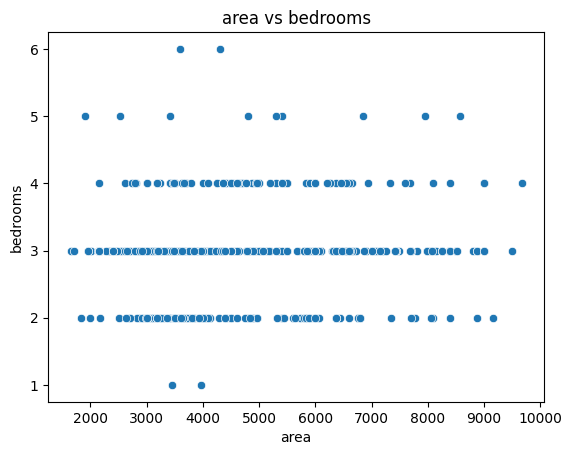

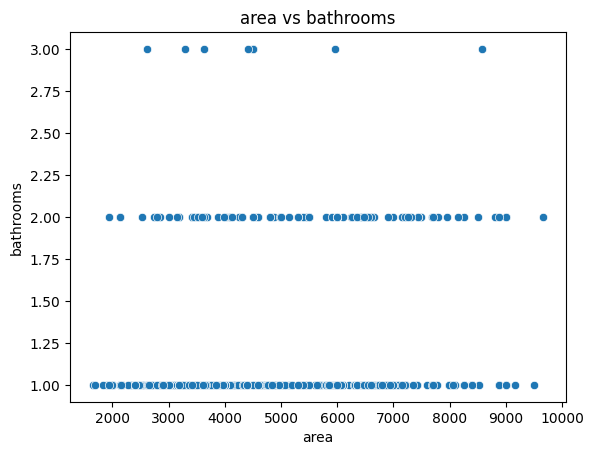

In [ ]:
sns.barplot(x='area',y='price',data=df)
plt.title("area vs price")
plt.show()

sns.lineplot(x='bedrooms',y='price',hue='parking',data=df)
plt.title("bedrooms vs price")
plt.show()

sns.scatterplot(x='area',y='bedrooms',data=df)
plt.title("area vs bedrooms")
plt.show()

sns.scatterplot(x='area',y='bathrooms',data=df)
plt.title("area vs bathrooms")
plt.show()

data normalisation

In [ ]:
scaler=MinMaxScaler()
df[['price','area']]=scaler.fit_transform(df[['price','area']])
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
3,0.324074,0.355495,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,0.324074,0.355495,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
5,0.324074,0.355495,3.0,3.0,1.0,yes,no,yes,no,yes,2.0,yes,semi-furnished
6,0.324074,0.355495,4.0,3.0,4.0,yes,no,no,no,yes,2.0,yes,semi-furnished
12,1.000000,0.611201,4.0,2.0,2.0,yes,no,no,no,yes,1.0,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,0.787037,0.542597,4.0,2.0,4.0,yes,no,no,no,no,2.0,no,semi-furnished
599,0.768519,0.542597,4.0,2.0,4.0,yes,no,no,no,yes,1.0,no,furnished
600,0.768519,0.542597,3.0,2.0,3.0,yes,no,no,no,yes,0.0,no,semi-furnished
601,0.763889,0.542597,3.0,2.0,4.0,yes,no,no,no,yes,1.0,no,furnished


In [ ]:
standardiser=StandardScaler()
df[['price','area']]=standardiser.fit_transform(df[['price','area']])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
3,-0.257782,-0.181485,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,-0.257782,-0.181485,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
5,-0.257782,-0.181485,3.0,3.0,1.0,yes,no,yes,no,yes,2.0,yes,semi-furnished
6,-0.257782,-0.181485,4.0,3.0,4.0,yes,no,no,no,yes,2.0,yes,semi-furnished
12,2.814571,1.049307,4.0,2.0,2.0,yes,no,no,no,yes,1.0,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,1.846569,0.719095,4.0,2.0,4.0,yes,no,no,no,no,2.0,no,semi-furnished
599,1.762395,0.719095,4.0,2.0,4.0,yes,no,no,no,yes,1.0,no,furnished
600,1.762395,0.719095,3.0,2.0,3.0,yes,no,no,no,yes,0.0,no,semi-furnished
601,1.741352,0.719095,3.0,2.0,4.0,yes,no,no,no,yes,1.0,no,furnished


multiple linear regresion

In [ ]:
#maping categorical coloumns to numerical values
# binary_cols=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
# for col in binary_cols:
#   df[col]=df[col].map({"yes":1,"no":0})

# #handel furnishingstatus separately as it has more than 2 categories
# #awe will ues one hot encoding
# df_encoded=pd.get_dummies(df,columns=['furnishingstatus'],drop_first=True)

#define features and target
x=df[['area','bedrooms','bathrooms','stories','parking']]
y=df['price']
# x=df_encoded.drop('price',axis=1)
# y=df_encoded['price']
#splitting data into traning and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#create and train the linear regression model
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

predicting from the model

In [ ]:
y_pred=model.predict(x_test)
print("predicted value : ",y_pred)

print("actual value : ",y_test)


predicted value :  [ 0.09491307 -0.65615263 -0.26022973  0.46600121  1.60730741 -0.88124649
  1.50840045  1.01855889 -0.89314264 -0.13193789  0.11496472 -0.7028042
  1.77648702  0.17218571 -0.84275893 -0.5065271  -0.212099   -0.06059421
  0.66685288  0.00430768  0.01198857 -0.10663027  1.52505164  0.48157038
 -0.87798088  0.72323235 -0.32993426 -0.40690936 -0.35923195 -0.06265395
 -0.20225794 -0.77339708  0.49992836 -0.84440835  0.10659847  0.34976261
 -0.43256773  1.71172559 -0.55879982 -0.9127363  -0.70108714 -1.0678528
 -0.19162895  1.10724718  0.20089984 -0.53479088 -0.53286862 -0.95767081
 -0.48978872  0.78417986 -0.04961447  0.93847274  2.2081269   0.43480893
 -0.04531961  0.1260121  -0.79610736  0.86513696 -0.08213012 -0.42961964
  0.54951562  2.36614635  0.88633535 -0.92967986 -1.00837203  0.64156013
 -1.02135021  0.07003021  0.05397499 -0.49026669  0.37916971 -0.20651788
  0.25293762  1.24720192  0.13365684 -0.35031196  0.37882704 -0.5364403
 -0.60950105 -0.203975    0.5568560

slope and intercept

In [ ]:
print(model.coef_)
print(model.intercept_)

[0.38851282 0.05769896 0.54353091 0.41780445 0.128975  ]
-1.6857024266778882
